# Week 1: Customer Sign-Up Behaviour & Data Quality Audit

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Cleaning

In [2]:
customer_signups = pd.read_csv("customer_signups.csv")

In [3]:
customer_signups.head(10)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other
5,CUST00005,John Gonzales,john5@mailhub.org,06-01-24,Facebook,South,Premium,No,34,Other
6,CUST00006,Crystal Mason,crystal6@mailhub.org,07-01-24,YouTube,North,UnknownPlan,Yes,40,male
7,CUST00007,Michael Bailey,michael7@mailhub.org,08-01-24,YouTube,Central,Pro,Yes,60,Other
8,CUST00008,Bianca Morris,bianca8@example.com,09-01-24,Referral,West,Pro,Yes,25,male
9,CUST00009,Cindy Anderson,NaN,10-01-24,Google,East,PREMIUM,No,29,FEMALE


In [4]:
customer_signups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


In [5]:
# check for duplicates by customer_id
print(customer_signups.duplicated(subset="customer_id").sum())

# remove duplicate
customer_signups = customer_signups.drop_duplicates(subset="customer_id")
print("Dataframe size is", customer_signups.shape)

1
Dataframe size is (299, 10)


In [6]:
# check for missing values
customer_signups.isna().sum(axis=0)

customer_id          1
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [7]:
features = ["signup_date", "age", "region", "source", "plan_selected", "marketing_opt_in", "gender"]

# resolve missing values
customer_signups.loc[:,"region"] = customer_signups.loc[:,"region"].fillna("Unknown")
print(customer_signups.groupby("region").apply(lambda x: x.isna().sum().sum(), include_groups=False)) # see number of missing entries per region
customer_signups.loc[:,"source"] = customer_signups.loc[:,"source"].fillna("Unknown")
customer_signups.loc[:,"plan_selected"] = customer_signups.loc[:,"plan_selected"].fillna("UnknownPlan")
customer_signups.loc[:,"gender"] = customer_signups.loc[:,"gender"].fillna("unknown")


customer_signups_drop_na = customer_signups.dropna(subset=features) # missing ids, names and emails are inconsequential to our analysis
customer_signups_drop_na = customer_signups_drop_na.dropna(subset=["customer_id", "name", "email"], how="all") # if all of id, name, email are missing, we cannot be sure that entry is genuine 
print("\n", customer_signups_drop_na.shape)
print(f"Percentage of data remaining after dropping rows with missing values: {customer_signups_drop_na.shape[0]/customer_signups.shape[0]*100:.3f}%")

region
Central    10
East       19
North      25
South      13
Unknown     9
West       17
dtype: int64

 (275, 10)
Percentage of data remaining after dropping rows with missing values: 91.973%


In [8]:
# standardise string formatting
customer_signups_drop_na.loc[:,"gender"] = customer_signups_drop_na.loc[:,"gender"].str.lower()
customer_signups_drop_na.loc[:,"plan_selected"] = customer_signups_drop_na.loc[:,"plan_selected"].str.lower()

In [9]:
# convert data types to remove some errant entries
customer_signups_drop_na.loc[:,"signup_date"] = pd.to_datetime(customer_signups_drop_na.loc[:,"signup_date"], format="%d-%m-%y", errors="coerce")
customer_signups_drop_na.loc[:,"age"] = pd.to_numeric(customer_signups_drop_na.loc[:,"age"], errors = "coerce")

In [10]:
customer_signups_drop_na.head(10)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-01-02 00:00:00,LinkedIn,West,basic,Yes,29.0,male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-01-03 00:00:00,Google,North,premium,Yes,34.0,non-binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-01-04 00:00:00,YouTube,Unknown,pro,No,40.0,male
4,CUST00004,NaN,matthew4@mailhub.org,2024-01-05 00:00:00,LinkedIn,West,premium,No,25.0,other
5,CUST00005,John Gonzales,john5@mailhub.org,2024-01-06 00:00:00,Facebook,South,premium,No,34.0,other
6,CUST00006,Crystal Mason,crystal6@mailhub.org,2024-01-07 00:00:00,YouTube,North,unknownplan,Yes,40.0,male
7,CUST00007,Michael Bailey,michael7@mailhub.org,2024-01-08 00:00:00,YouTube,Central,pro,Yes,60.0,other
8,CUST00008,Bianca Morris,bianca8@example.com,2024-01-09 00:00:00,Referral,West,pro,Yes,25.0,male
9,CUST00009,Cindy Anderson,NaN,2024-01-10 00:00:00,Google,East,premium,No,29.0,female
10,CUST00010,Kendra Gill,kendra10@mailhub.org,2024-01-11 00:00:00,Google,Central,pro,No,29.0,male


In [11]:
customer_signups_drop_na = customer_signups_drop_na.dropna(subset=["signup_date", "age"])
print(customer_signups_drop_na.shape)
print(f"Percentage of data remaining after dropping rows with missing values: {customer_signups_drop_na.shape[0]/customer_signups.shape[0]*100:.3f}%")

(263, 10)
Percentage of data remaining after dropping rows with missing values: 87.960%


In [12]:
# look for other errant data
for col in features[2:]:
    print(f"Unique values in '{col}':")
    print(customer_signups_drop_na[col].unique())

Unique values in 'region':
['West' 'North' 'Unknown' 'South' 'Central' 'East']
Unique values in 'source':
['LinkedIn' 'Google' 'YouTube' 'Facebook' 'Referral' 'Instagram' 'Unknown'
 '??']
Unique values in 'plan_selected':
['basic' 'premium' 'pro' 'unknownplan']
Unique values in 'marketing_opt_in':
['Yes' 'No' 'Nil']
Unique values in 'gender':
['male' 'non-binary' 'other' 'female' 'unknown' '123']


In [13]:
# resolve errant data
customer_signups_drop_na["source"] = customer_signups_drop_na["source"].replace("??", "Unknown")

customer_signups_final = customer_signups_drop_na[(customer_signups_drop_na["marketing_opt_in"] != "Nil") & (customer_signups_drop_na["gender"] != "123")]
print(customer_signups_final.shape)
print(f"Percentage of data remaining after cleaning: {customer_signups_final.shape[0]/customer_signups.shape[0]*100:.3f}%")

(257, 10)
Percentage of data remaining after cleaning: 85.953%


In [14]:
# convert data types
customer_signups_final = customer_signups_final.copy()
customer_signups_final["signup_date"] = pd.to_datetime(customer_signups_final.loc[:,"signup_date"])
customer_signups_final["age"] = pd.to_numeric(customer_signups_final.loc[:,"age"], downcast='integer')

customer_signups_final["gender"] = customer_signups_final.loc[:,"gender"].astype("category")
customer_signups_final["marketing_opt_in"] = customer_signups_final.loc[:,"marketing_opt_in"].astype("category")
customer_signups_final["plan_selected"] = customer_signups_final.loc[:,"plan_selected"].astype("category")
customer_signups_final["region"] = customer_signups_final.loc[:,"region"].astype("category")
customer_signups_final["source"] = customer_signups_final.loc[:,"source"].astype("category")

In [15]:
customer_signups_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 1 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       256 non-null    object        
 1   name              249 non-null    object        
 2   email             228 non-null    object        
 3   signup_date       257 non-null    datetime64[ns]
 4   source            257 non-null    category      
 5   region            257 non-null    category      
 6   plan_selected     257 non-null    category      
 7   marketing_opt_in  257 non-null    category      
 8   age               257 non-null    int8          
 9   gender            257 non-null    category      
dtypes: category(5), datetime64[ns](1), int8(1), object(3)
memory usage: 12.6+ KB


In [16]:
customer_signups_final.describe()

,signup_date,age
count,257,257.000000
mean,2024-05-31 01:12:50.428015616,35.673152
min,2024-01-02 00:00:00,21.000000
25%,2024-03-14 00:00:00,25.000000
50%,2024-06-03 00:00:00,34.000000
75%,2024-08-14 00:00:00,40.000000
max,2024-10-26 00:00:00,60.000000
std,NaN,11.055355


In [17]:
customer_signups_final.head(20)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-01-02,LinkedIn,West,basic,Yes,29,male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-01-03,Google,North,premium,Yes,34,non-binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-01-04,YouTube,Unknown,pro,No,40,male
4,CUST00004,NaN,matthew4@mailhub.org,2024-01-05,LinkedIn,West,premium,No,25,other
5,CUST00005,John Gonzales,john5@mailhub.org,2024-01-06,Facebook,South,premium,No,34,other
6,CUST00006,Crystal Mason,crystal6@mailhub.org,2024-01-07,YouTube,North,unknownplan,Yes,40,male
7,CUST00007,Michael Bailey,michael7@mailhub.org,2024-01-08,YouTube,Central,pro,Yes,60,other
8,CUST00008,Bianca Morris,bianca8@example.com,2024-01-09,Referral,West,pro,Yes,25,male
9,CUST00009,Cindy Anderson,NaN,2024-01-10,Google,East,premium,No,29,female
10,CUST00010,Kendra Gill,kendra10@mailhub.org,2024-01-11,Google,Central,pro,No,29,male


## Exploratory Data Analysis

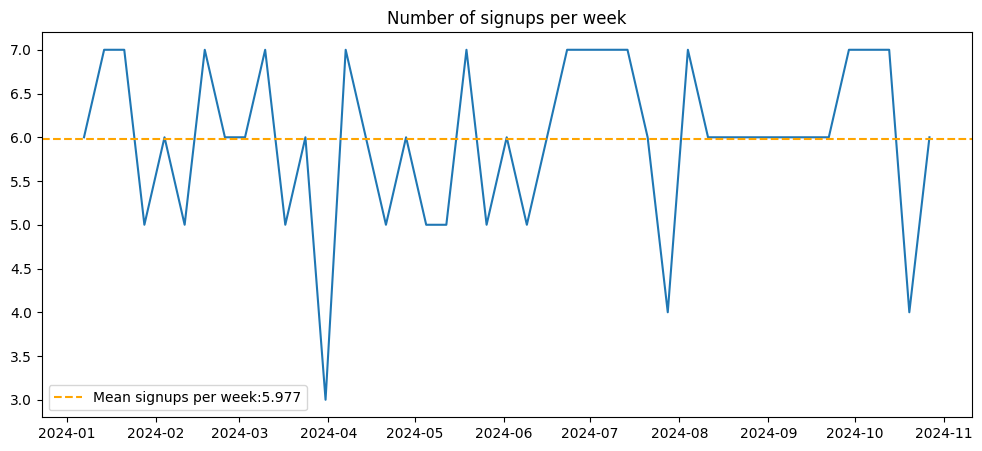

In [18]:
# signup counts per week
signup_count_per_week = customer_signups_final.groupby(pd.Grouper(key="signup_date", freq="W")).size().reset_index(name="signup_count")

# bar chart
plt.figure(figsize=(12,5))
plt.plot(signup_count_per_week["signup_date"], signup_count_per_week["signup_count"])
plt.axhline(signup_count_per_week.loc[:,"signup_count"].mean(), linestyle = '--', color='orange', label=f"Mean signups per week:{signup_count_per_week.loc[:,'signup_count'].mean():.3f}")
plt.title("Number of signups per week")
plt.legend()
plt.show()

      source  signup_count
0   Facebook            36
1     Google            47
2  Instagram            37
3   LinkedIn            33
4   Referral            38
5    Unknown            13
6    YouTube            53


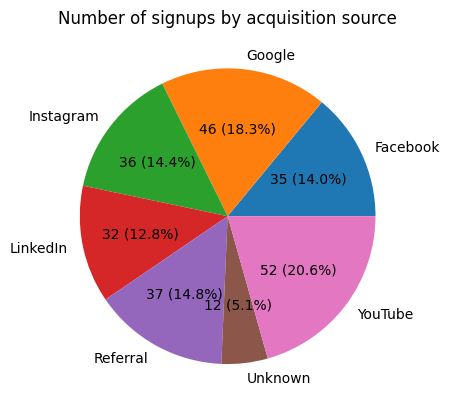

In [19]:
# signup counts per source
signup_count_per_source = customer_signups_final.groupby("source", observed=False).size().reset_index(name="signup_count")
print(signup_count_per_source)

# pie chart
plt.pie(signup_count_per_source["signup_count"], labels=signup_count_per_source["source"], autopct=lambda p: f"{int(p * sum(signup_count_per_source['signup_count']) / 100)} ({p:.1f}%)")
plt.title("Number of signups by acquisition source")
plt.show()

      source  signup_count
0   Facebook             5
1     Google             6
2  Instagram             3
3   LinkedIn             2
4   Referral             2
5    Unknown             3
6    YouTube             7


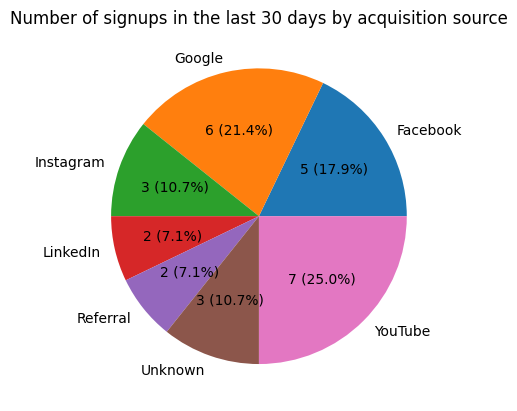

In [20]:
# signup counts per source in the last 30 days
signup_count_per_source_30days = customer_signups_final[customer_signups_final["signup_date"] >= (customer_signups_final["signup_date"].max() - pd.Timedelta(days=30))].groupby("source", observed=False).size().reset_index(name="signup_count")
print(signup_count_per_source_30days)

# pie chart
plt.pie(signup_count_per_source_30days["signup_count"], labels=signup_count_per_source_30days["source"], autopct=lambda p: f"{int(p * sum(signup_count_per_source_30days['signup_count']) / 100)} ({p:.1f}%)")
plt.title("Number of signups in the last 30 days by acquisition source")
plt.show()

    region  signup_count
0  Central            33
1     East            49
2    North            57
3    South            52
4  Unknown            27
5     West            39


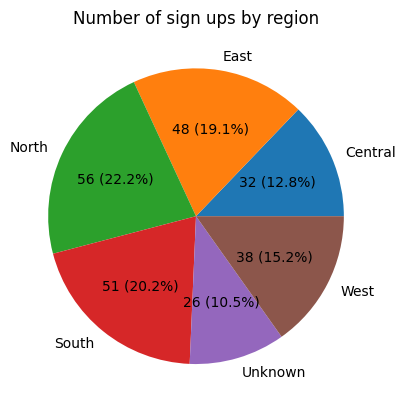

In [21]:
# signup counts per region
signup_count_per_region = customer_signups_final.groupby("region", observed=False).size().reset_index(name="signup_count")
print(signup_count_per_region)
# pie chart
plt.pie(signup_count_per_region["signup_count"], labels=signup_count_per_region["region"], autopct=lambda p: f"{int(p * sum(signup_count_per_region['signup_count']) / 100)} ({p:.1f}%)")
plt.title("Number of sign ups by region")
plt.show()

  plan_selected  signup_count
0         basic            75
1       premium            90
2           pro            79
3   unknownplan            13


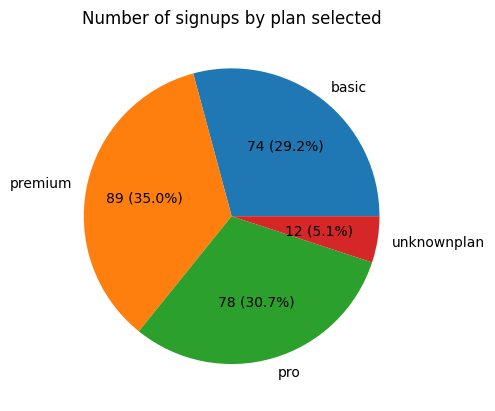

In [22]:
# signup counts by plan selected
signup_count_per_plan = customer_signups_final.groupby("plan_selected", observed=False).size().reset_index(name="signup_count")
print(signup_count_per_plan)
# pie chart
plt.pie(signup_count_per_plan["signup_count"], labels=signup_count_per_plan["plan_selected"], autopct=lambda p: f"{int(p * sum(signup_count_per_plan['signup_count']) / 100)} ({p:.1f}%)")
plt.title("Number of signups by plan selected")
plt.show()

In [23]:
# marketing opt-in count by gender
opt_in_count_per_gender = customer_signups_final.groupby("gender", observed=False).agg(total_customers=("marketing_opt_in", "size"),
                                                                                       opt_in_count=("marketing_opt_in", lambda x: (x == "Yes").sum())).reset_index()
opt_in_count_per_gender["opt_in_rate"] = opt_in_count_per_gender["opt_in_count"]/opt_in_count_per_gender["total_customers"]*100
opt_in_count_per_gender


,gender,total_customers,opt_in_count,opt_in_rate
0,female,83,38,45.783133
1,male,78,33,42.307692
2,non-binary,37,17,45.945946
3,other,52,21,40.384615
4,unknown,7,4,57.142857


count    257.000000
mean      35.673152
std       11.055355
min       21.000000
25%       25.000000
50%       34.000000
75%       40.000000
max       60.000000
Name: age, dtype: float64


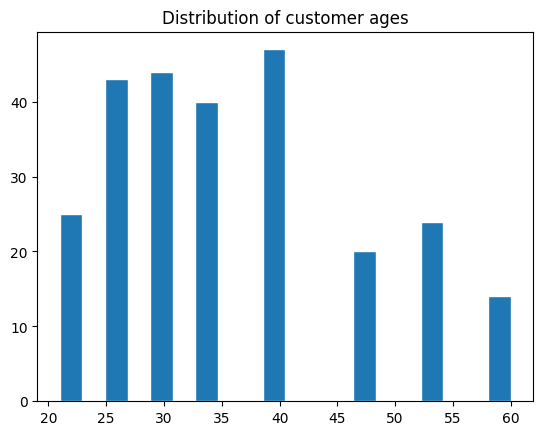

In [24]:
# summary statistics for age
print(customer_signups_final["age"].describe())

# histogram
plt.hist(customer_signups_final["age"], edgecolor = "white", bins=20)
plt.title("Distribution of customer ages")
plt.show()

In [25]:
# split into age groups
bins = np.arange(customer_signups_final.loc[:,"age"].min() - (customer_signups_final.loc[:,"age"].min()%5), customer_signups_final.loc[:,"age"].max() + 6, 5)
labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

customer_signups_final.loc[:,"age_group"] = pd.cut(customer_signups_final.loc[:,"age"], bins, labels=labels, right=False)

In [26]:
# marketing opt-in by age
opt_in_count_by_age_grp = customer_signups_final.groupby("age_group", observed=False).agg(total_customers=("marketing_opt_in", "size"),
                                                                                       opt_in_count=("marketing_opt_in", lambda x: (x == "Yes").sum())).reset_index()

opt_in_count_by_age_grp["opt_in_rate"] = opt_in_count_by_age_grp["opt_in_count"]/opt_in_count_by_age_grp["total_customers"]*100
opt_in_count_by_age_grp

,age_group,total_customers,opt_in_count,opt_in_rate
0,20–24,25,7,28.000000
1,25–29,87,41,47.126437
2,30–34,40,17,42.500000
3,35–39,0,0,NaN
4,40–44,47,22,46.808511
5,45–49,20,10,50.000000
6,50–54,24,10,41.666667
7,55–59,0,0,NaN
8,60–64,14,6,42.857143


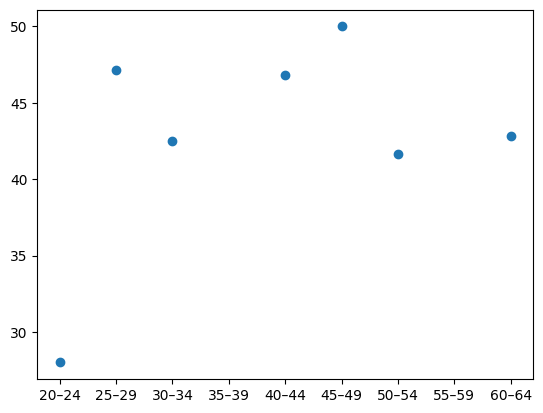

In [27]:
plt.scatter(opt_in_count_by_age_grp.loc[:,"age_group"], opt_in_count_by_age_grp.loc[:,"opt_in_rate"])
plt.show()

In [28]:
# plan per age group
plan_by_age_grp = pd.crosstab(customer_signups_final["age_group"], customer_signups_final["plan_selected"])
plan_by_age_grp

plan_selected,basic,premium,pro,unknownplan
age_group,,,,
20–24,8,4,12,1
25–29,30,30,23,4
30–34,9,15,14,2
40–44,10,22,13,2
45–49,4,9,5,2
50–54,9,6,8,1
60–64,5,4,4,1
